This is a script to generate a standard curve and compute sample protein concentrations using the Pierce BCA Protein Assay Kit from Thermo Scientific (23225 or 23227)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.style.use('ggplot')

In [5]:
data = pd.read_csv("E:\BCA for ELISA\Andrew_practice_BCA_03012017.csv")

In [6]:
data.shape

(8, 14)

In [7]:
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,Unnamed: 13
0,A,1.779,1.810,0.522,0.046,0.045,0.047,0.048,0.046,0.046,0.046,0.047,0.048,562
1,B,1.387,1.453,0.548,0.046,0.047,0.047,0.046,0.045,0.046,0.048,0.047,0.048,562
2,C,1.086,1.149,1.417,0.046,0.045,0.046,0.045,0.046,0.049,0.047,0.047,0.046,562
3,D,0.854,0.936,1.259,0.046,0.046,0.046,0.045,0.046,0.048,0.047,0.047,0.047,562
4,E,0.663,0.666,0.135,0.046,0.046,0.047,0.046,0.047,0.051,0.047,0.046,0.048,562
5,F,0.397,0.397,0.134,0.046,0.046,0.046,0.046,0.046,0.048,0.052,0.046,0.047,562
6,G,0.268,0.274,0.446,0.046,0.046,0.046,0.045,0.046,0.046,0.046,0.046,0.046,562
7,H,0.132,0.133,0.423,0.047,0.046,0.045,0.046,0.046,0.047,0.046,0.047,0.046,562


In [8]:
data["std_average"] = (data["1"] + data["2"])/2
print(data["std_average"][len(data)-1])
data["std_average_background_subtract"] = data["std_average"] - data["std_average"][len(data)-1]
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,Unnamed: 13,std_average,std_average_background_subtract
0,A,1.779,1.810,0.522,0.046,0.045,0.047,0.048,0.046,0.046,0.046,0.047,0.048,562,1.7945,1.6620
1,B,1.387,1.453,0.548,0.046,0.047,0.047,0.046,0.045,0.046,0.048,0.047,0.048,562,1.4200,1.2875
2,C,1.086,1.149,1.417,0.046,0.045,0.046,0.045,0.046,0.049,0.047,0.047,0.046,562,1.1175,0.9850
3,D,0.854,0.936,1.259,0.046,0.046,0.046,0.045,0.046,0.048,0.047,0.047,0.047,562,0.8950,0.7625
4,E,0.663,0.666,0.135,0.046,0.046,0.047,0.046,0.047,0.051,0.047,0.046,0.048,562,0.6645,0.5320
5,F,0.397,0.397,0.134,0.046,0.046,0.046,0.046,0.046,0.048,0.052,0.046,0.047,562,0.3970,0.2645
6,G,0.268,0.274,0.446,0.046,0.046,0.046,0.045,0.046,0.046,0.046,0.046,0.046,562,0.2710,0.1385
7,H,0.132,0.133,0.423,0.047,0.046,0.045,0.046,0.046,0.047,0.046,0.047,0.046,562,0.1325,0.0000


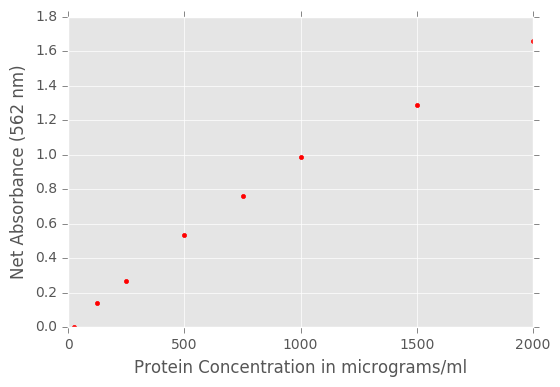

In [9]:
concentration = [2000, 1500, 1000, 750, 500, 250, 125, 25]
absorbance = data["std_average_background_subtract"]

plt.plot(concentration, absorbance, 'r.')
plt.xlabel('Protein Concentration in micrograms/ml')
plt.ylabel('Net Absorbance (562 nm)')
plt.show()


0.0662056440538
0.000829651194727


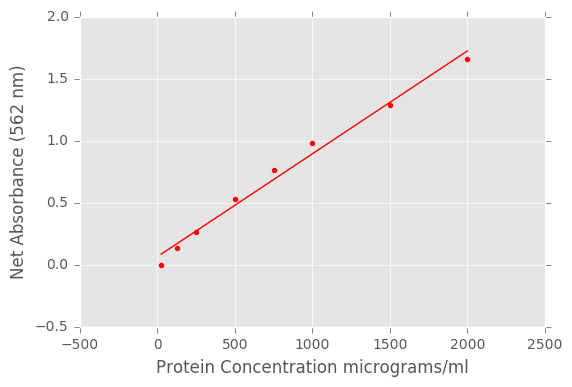

In [16]:
from pylab import *

(m,b) = polyfit(concentration, absorbance, 1)
print(b)
print(m)

abs_poly = polyval([m, b], concentration)

plot(concentration, abs_poly, '-r')
scatter(concentration, absorbance, c = 'red')
xlabel('Protein Concentration micrograms/ml')
ylabel('Net Absorbance (562 nm)')
show()


In [20]:
data["sample_abs_background_subtract"] = data["3"] - data["std_average"][len(data)-1]
data["final_sample_concentrations"] = (data["sample_abs_background_subtract"] - b)/m
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,Unnamed: 13,std_average,std_average_background_subtract,sample_abs_background_subtract,final_sample_concentrations
0,A,1.779,1.810,0.522,0.046,0.045,0.047,0.048,0.046,0.046,0.046,0.047,0.048,562,1.7945,1.6620,0.3895,389.675032
1,B,1.387,1.453,0.548,0.046,0.047,0.047,0.046,0.045,0.046,0.048,0.047,0.048,562,1.4200,1.2875,0.4155,421.013503
2,C,1.086,1.149,1.417,0.046,0.045,0.046,0.045,0.046,0.049,0.047,0.047,0.046,562,1.1175,0.9850,1.2845,1468.441634
3,D,0.854,0.936,1.259,0.046,0.046,0.046,0.045,0.046,0.048,0.047,0.047,0.047,562,0.8950,0.7625,1.1265,1278.000156
4,E,0.663,0.666,0.135,0.046,0.046,0.047,0.046,0.047,0.051,0.047,0.046,0.048,562,0.6645,0.5320,0.0025,-76.786057
5,F,0.397,0.397,0.134,0.046,0.046,0.046,0.046,0.046,0.048,0.052,0.046,0.047,562,0.3970,0.2645,0.0015,-77.991383
6,G,0.268,0.274,0.446,0.046,0.046,0.046,0.045,0.046,0.046,0.046,0.046,0.046,562,0.2710,0.1385,0.3135,298.070270
7,H,0.132,0.133,0.423,0.047,0.046,0.045,0.046,0.046,0.047,0.046,0.047,0.046,562,0.1325,0.0000,0.2905,270.347777


In [19]:
# Chekcer

x = [2000, 1500, 1000, 750, 500, 250, 125, 25, -75, 250, 0.0]
values = []
for i in x:
    value = m*i + b
    values.append(value)
values

[1.7255080335072781,
 1.3106824361439162,
 0.89585683878055467,
 0.68844404009887372,
 0.481031241417193,
 0.27361844273551211,
 0.1699120433946717,
 0.086946923921999347,
 0.0039818044493270116,
 0.27361844273551211,
 0.066205644053831267]